In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
dados = pd.read_csv('questao1.txt',sep='\t')

In [4]:
corrente_diodo = dados['I(D1)']
tensao_diodo = dados['v1']

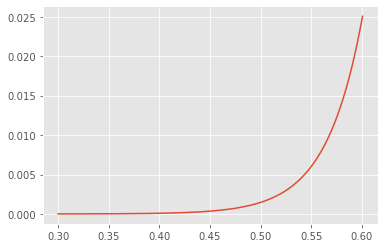

In [5]:
plt.plot(tensao_diodo,corrente_diodo)

In [6]:
#Fatiar o vetores de forma a pegar apenas o ultimo oitavo com a função array_split.
#Detalhe: Em python os índices dos vetores começam em zero. Por isso, o índice 7 foi escolhido para pegar o ultimo oitavo.
tensao_diodo_oitavo = np.array_split(tensao_diodo,8)[7]
corrente_diodo_oitavo = np.array_split(corrente_diodo,8)[7]


In [7]:
#Linearizando a característica no último oitavo.
b, a = np.polynomial.polynomial.polyfit(tensao_diodo_oitavo,corrente_diodo_oitavo,1)
rd = 1/a
Vd0 = -b/a
corrente_diodo_linear = tensao_diodo_oitavo/rd - Vd0/rd;


In [8]:
print(f"Para o modelo linearizado, temos que rd:{rd:.3f} Ohm e Vd0:{Vd0:.3f} V.")

Para o modelo linearizado, temos que rd:2.338 Ohm e Vd0:0.546 V.


In [12]:
#Ajuste da caracteristica exponencial
corrente_diodo_ln = np.log(corrente_diodo)
d, c = np.polynomial.polynomial.polyfit(tensao_diodo,corrente_diodo_ln,1)
eta = 1/(0.026*c)
Is = np.exp(d)

In [13]:
corrente_diodo_exp = Is*np.exp(tensao_diodo/(0.026*eta))

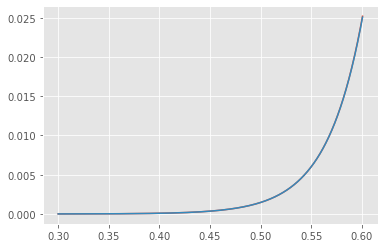

In [17]:
plt.figure(1)
plt.plot(tensao_diodo,corrente_diodo_exp)
plt.plot(tensao_diodo,corrente_diodo)
plt.savefig('output1.png')

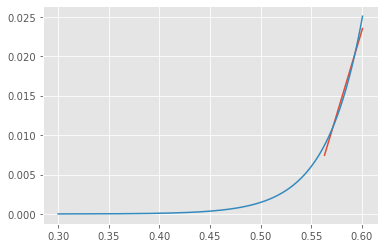

In [14]:
plt.figure(2)
plt.plot(tensao_diodo_oitavo,corrente_diodo_linear)
plt.plot(tensao_diodo,corrente_diodo)
plt.savefig('output2.png')

#### Para fins de comparação vou analisar os valores do código fornecido na aula

In [ ]:
tensao_diodo_ex  = pd.read_csv('vdt.txt',sep='\t')['v']
corrente_diodo_ex = pd.read_csv('idt.txt',sep='\t')['i']

In [ ]:
b_ex, a_ex = np.polynomial.polynomial.polyfit(tensao_diodo_ex,corrente_diodo_ex,1)
rd_ex = 1/a_ex
Vd0_ex = -b_ex/a_ex
#Corresponde aos valores esperados

In [ ]:
print(f"Para o modelo linearizado temos que rd:{rd_ex:.3f} Ohm e Vd0:{Vd0_ex:.3f} V.")

Para o modelo linearizado temos que rd:1.275 Ohm e Vd0:0.726 V.
